<a href="https://colab.research.google.com/github/Dilavarj7/Facebook-Comment-Volume/blob/main/Dilavar_Singh_Team_5_Facebook_Comment_Volume_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Project Title : Facebook Comment Volume Dataset Data Set</b>

### **Data Set Information:**
The dataset contains 5 variants of the dataset, for the details about the variants and detailed analysis read and cite the research paper.
Attribute Information:
1. Page Popularity/likes ,Decimal Encoding,Page feature
Defines the popularity or support for the source of the document.
2
Page Checkinsâ€™s
Decimal Encoding
Page feature
Describes how many individuals so far visited this place. This feature is only associated with the places eg:some institution, place, theater etc.
3
Page talking about
Decimal Encoding
Page feature
Defines the daily interest of individuals towards source of the document/ Post. The people who actually come back to the page, after liking the page. This include activities such as comments, likes to a post, shares, etc by visitors to the page.


4
Page Category
Value Encoding
Page feature
Defines the category of the source of the document eg: place, institution, brand etc.


5 - 29
Derived
Decimal Encoding
Derived feature
These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features.


30
CC1
Decimal Encoding
Essential feature
The total number of comments before selected base date/time.


31
CC2
Decimal Encoding
Essential feature
The number of comments in last 24 hours, relative to base date/time.


32
CC3
Decimal Encoding
Essential feature
The number of comments in last 48 to last 24 hours relative to base date/time.


33
CC4
Decimal Encoding
Essential feature
The number of comments in the first 24 hours after the publication of post but before base date/time.


34
CC5
Decimal Encoding
Essential feature
The difference between CC2 and CC3.


35
Base time
Decimal(0-71) Encoding
Other feature
Selected time in order to simulate the scenario.


36
Post length
Decimal Encoding
Other feature
Character count in the post.


37
Post Share Count
ï¿¼ï¿¼Decimal Encoding
Other feature
This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline.


38
Post Promotion Status
ï¿¼ï¿¼Binary Encoding
Other feature
To reach more people with posts in News Feed, individual promote their post and this features tells that whether the post is promoted(1) or not(0).


39
H Local
ï¿¼Decimal(0-23) Encoding
Other feature
This describes the H hrs, for which we have the target variable/ comments received.


40-46
Post published weekday
Binary Encoding
Weekdays feature
This represents the day(Sunday...Saturday) on which the post was published.


47-53
Base DateTime weekday
Binary Encoding
Weekdays feature
This represents the day(Sunday...Saturday) on selected base Date/Time.

54
Target Variable
Decimal
Target
The no of comments in next H hrs(H is given in Feature no 39).




## **Importing Important libraray and connecting Drive**

In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading Train and Test Data**

In [3]:
columns=['Page_likes', 'Page_views', 'Daily_visitors', 'page_type', 'der_1', 'der_2', 'der_3', 'der_4', 'der_5', 'der_6', 'der_7', 'der_8', 'der_9', 'der_10', 'der_11', 'der_12', 'der_13', 'der_14', 'der_15', 'der_16', 'der_17', 'der_18', 'der_19', 'der_20', 'der_21', 'der_22', 'der_23', 'der_24', 'der_25', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base_time', 'Post_length', 'Post_share_count', 'Post_promotion_status', 'H', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun_time', 'Mon_time', 'Tues_time', 'Wed_time', 'Thurs_time', 'Fri_time', 'Sat_time', 'Num_of_comments']

In [4]:
training_files = ['Features_Variant_1.csv', 'Features_Variant_2.csv', 'Features_Variant_3.csv','Features_Variant_4.csv', 'Features_Variant_5.csv']
test_files = ['Test_Case_1.csv', 'Test_Case_2.csv', 'Test_Case_3.csv','Test_Case_4.csv', 'Test_Case_5.csv','Test_Case_6.csv', 'Test_Case_7.csv', 'Test_Case_8.csv', 'Test_Case_9.csv', 'Test_Case_10.csv']

In [5]:
train_file_location = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/data/dat/train/'
test_file_location = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/data/dat/test/'

### **Train Data**

In [6]:
train_data = pd.concat([pd.read_csv(train_file_location + csv_file_train, header=None,names=columns) for csv_file_train in training_files])

In [7]:
train_data=train_data.reset_index()
del train_data['index']

In [8]:
train_data.head()

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,H,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,Sun_time,Mon_time,Tues_time,Wed_time,Thurs_time,Fri_time,Sat_time,Num_of_comments
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602813 entries, 0 to 602812
Data columns (total 54 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Page_likes             602813 non-null  int64  
 1   Page_views             602813 non-null  int64  
 2   Daily_visitors         602813 non-null  int64  
 3   page_type              602813 non-null  int64  
 4   der_1                  602813 non-null  float64
 5   der_2                  602813 non-null  float64
 6   der_3                  602813 non-null  float64
 7   der_4                  602813 non-null  float64
 8   der_5                  602813 non-null  float64
 9   der_6                  602813 non-null  float64
 10  der_7                  602813 non-null  float64
 11  der_8                  602813 non-null  float64
 12  der_9                  602813 non-null  float64
 13  der_10                 602813 non-null  float64
 14  der_11                 602813 non-nu

In [10]:
train_data.describe()

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,H,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,Sun_time,Mon_time,Tues_time,Wed_time,Thurs_time,Fri_time,Sat_time,Num_of_comments
count,6.028130e+05,602813.000000,6.028130e+05,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.0,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000,602813.000000
mean,1.313640e+06,4673.203879,4.476571e+04,24.247191,0.647484,477.611931,55.862191,35.350722,67.970492,0.093704,360.645263,21.832324,7.191323,40.655821,0.004783,356.096927,19.975198,4.891739,40.381204,0.637869,432.107557,52.712841,33.713858,63.399954,-303.691939,355.070838,1.857127,-2.154098,56.575764,55.862191,21.832324,19.975198,52.712841,1.857127,35.455246,163.653299,117.301825,0.0,23.776863,0.122373,0.143268,0.149655,0.157304,0.144224,0.146236,0.136940,0.140055,0.133871,0.137734,0.146691,0.154759,0.144649,0.142241,7.163027
std,6.803585e+06,20575.824358,1.109773e+05,19.941391,13.109703,531.568316,86.496000,68.596065,82.578215,4.429349,427.060351,35.877491,19.721355,52.121184,0.767188,416.974563,31.295723,13.155559,52.277911,12.840748,488.500363,80.986855,64.795633,76.999296,368.772680,425.727758,11.986586,11.768231,74.411902,137.552591,75.211108,73.096146,128.480828,94.242410,20.974073,375.782004,951.304620,0.0,1.858326,0.327716,0.350347,0.356733,0.364088,0.351317,0.353343,0.343784,0.347044,0.340514,0.344621,0.353798,0.361676,0.351746,0.349298,34.462254
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2038.000000,-204.000000,-584.666667,-1411.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2038.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,47.000000,5.419108,2.000000,8.032349,0.000000,38.000000,2.037736,0.000000,4.661879,0.000000,37.000000,1.961814,0.000000,4.556037,0.000000,43.000000,5.146154,2.000000,7.555776,-428.000000,38.000000,-0.144578,-2.000000,6.557562,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,251.000000,23.647407,12.000000,33.771923,0.000000,175.000000,8.759322,2.000000,18.702148,0.000000,179.000000,8.133663,1.000000,19.060953,0.000000,231.000000,21.677140,12.000000,31.014726,-139.000000,164.000000,0.233365,0.000000,25.481725,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,97.000000,13.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,760.000000,71.316946,41.000000,103.316009,0.000000,552.000000,27.380410,7.000000,59.479737,0.000000,535.000000,26.276471,5.000000,59.093147,0.000000,683.000000,68.

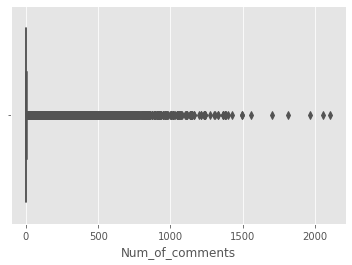

In [11]:
sns.boxplot(x='Num_of_comments',data=train_data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


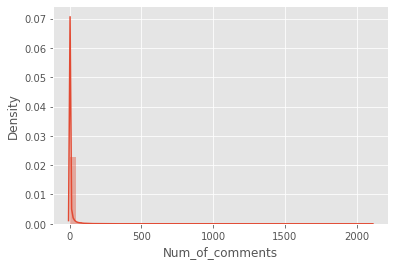

In [12]:
sns.distplot(train_data['Num_of_comments'])

### **Test Data**

In [13]:
test_data = pd.concat([pd.read_csv(test_file_location + csv_file_test, header=None,names=columns) for csv_file_test in test_files])

In [14]:
test_data=test_data.reset_index()
del test_data['index']

In [15]:
test_data.head()

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,H,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,Sun_time,Mon_time,Tues_time,Wed_time,Thurs_time,Fri_time,Sat_time,Num_of_comments
0,1340759,33935,49392,9,0.0,768.0,77.200000,36.5,132.861432,0.0,275.0,28.600000,14.0,45.466911,0.0,716.0,47.825000,0.0,124.050572,0.0,744.0,76.000000,36.5,129.477604,-664.0,275.0,-19.225000,5.0,131.036538,0,0,0,0,0,0,150,23,0,22,0,0,0,0,1,0,0,0,0,0,0,1,0,0,35
1,161455,0,5978,4,3.0,75.0,22.714286,15.0,23.389340,3.0,75.0,16.857143,6.0,24.109444,0.0,15.0,4.142857,0.0,5.488392,3.0,75.0,21.142857,12.0,23.295791,-10.0,75.0,12.714286,5.0,26.266297,22,17,5,20,12,28,20,1,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
2,92385,88,34785,70,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0,0,0,0,32,182,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,395272,0,3406,17,0.0,22.0,4.000000,1.0,6.599663,0.0,22.0,3.111111,1.0,6.740334,0.0,2.0,0.222222,0.0,0.628539,0.0,22.0,3.888889,1.0,6.573422,-2.0,22.0,2.888889,1.0,6.870944,0,0,0,0,0,30,207,1,0,20,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,4349418,0,614043,9,0.0,958.0,65.974194,24.0,126.960748,0.0,787.0,61.096774,22.0,112.517169,0.0,371.0,4.877419,0.0,33.678238,0.0,912.0,65.587097,24.0,124.844202,-126.0,787.0,56.219355,21.0,107.096415,19,19,0,19,19,13,148,21,0,6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Page_likes             1000 non-null   int64  
 1   Page_views             1000 non-null   int64  
 2   Daily_visitors         1000 non-null   int64  
 3   page_type              1000 non-null   int64  
 4   der_1                  1000 non-null   float64
 5   der_2                  1000 non-null   float64
 6   der_3                  1000 non-null   float64
 7   der_4                  1000 non-null   float64
 8   der_5                  1000 non-null   float64
 9   der_6                  1000 non-null   float64
 10  der_7                  1000 non-null   float64
 11  der_8                  1000 non-null   float64
 12  der_9                  1000 non-null   float64
 13  der_10                 1000 non-null   float64
 14  der_11                 1000 non-null   float64
 15  der_1

In [17]:
test_data.describe()

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,H,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,Sun_time,Mon_time,Tues_time,Wed_time,Thurs_time,Fri_time,Sat_time,Num_of_comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.00000,1000.000000,1000.000000
mean,3.817063e+06,5.355491e+03,2.697175e+05,21.877000,8.931000,697.212000,96.942582,57.087500,124.455800,4.42500,580.730000,69.198961,39.584000,99.921873,1.545000,277.445000,22.796167,3.20850,49.364945,8.659000,671.022000,94.131895,55.928500,120.042634,-200.494000,568.292000,46.402794,28.12450,116.832214,101.405000,73.175000,24.724000,98.207000,48.451000,17.810000,154.684000,118.210000,0.0,14.610000,0.198000,0.072000,0.0,0.0,0.253000,0.24900,0.228000,0.335000,0.196000,0.0,0.0,0.082000,0.18300,0.204000,26.585000
std,8.887487e+06,4.103948e+04,4.965384e+05,20.646214,73.098698,812.417535,161.434780,131.048897,151.599834,55.24841,726.180408,122.118358,105.718186,127.046240,27.003429,445.905709,53.450916,32.13294,83.050378,71.496451,777.821777,156.342716,128.384425,144.743523,358.613999,723.239447,107.841176,98.80609,147.502305,298.458209,229.546536,137.597358,285.763989,240.356254,16.664561,366.490474,333.710684,0.0,8.992039,0.398692,0.258617,0.0,0.0,0.434948,0.43265,0.419753,0.472227,0.397167,0.0,0.0,0.274502,0.38686,0.403171,104.760381
min,4.233000e+03,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2119.000000,-392.000000,-392.000000,-392.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1296.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000
25%,5.182470e+05,0.000000e+00,2.314825e+04,9.000000,0.000000,56.500000,11.166667,5.500000,12.211437,0.00000,38.000000,8.000000,3.000000,9.742182,0.000000,11.750000,1.111111,0.00000,2.748737,0.000000,53.500000,10.833333,5.000000,11.473208,-183.500000,36.000000,3.277778,1.00000,11.495131,3.000000,1.000000,0.000000,3.000000,0.000000,4.000000,48.000000,3.000000,0.0,6.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000
50%,1.445497e+06,0.000000e+00,7.863500e+04,16.000000,0.000000,307.000000,53.964286,20.000000,67.123676,0.00000,215.000000,35.790210,13.000000,51.511261,0.000000,64.500000,4.877419,0.00000,16.181712,0.000000,307.000000,52.809524,19.000000,66.076105,-45.000000,194.000000,19.750000,7.00000,67.506316,18.000000,9.500000,0.000000,17.000000,5.000000,13.000000,97.500000,19.500000,0.0,16.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,2.000000
75%,4.290409e+06,1.925000e+01,2.775470e+05,27.000000,0.000000,1128.000000,118.228571,56.125000,199.593566,0.00000,937.000000,81.880658,34.000000,161.917770,0.000000,340.500000,24.653846,0.00000,62.521132,0.000000,999.000000,118.062500,55.250000,199.259019,-7.000000,898.250000,66.000000,22.00000,201.629992,69.000000,49.250000,0.000000,68.000000,39.000000,28.000000,161.000000,76.000000,0.0,24.000000,0.000000,0.000000,0.0,0.0,1.000000,0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


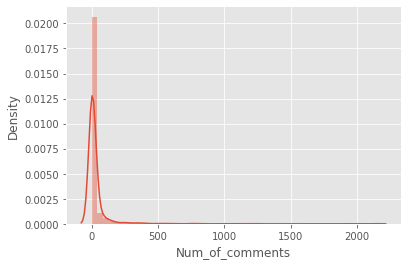

In [18]:
sns.distplot(test_data['Num_of_comments'])

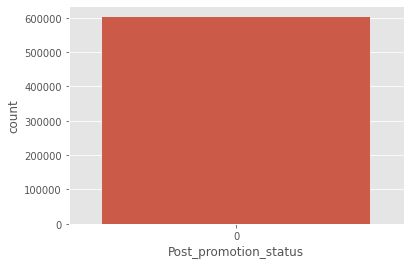

In [19]:
sns.countplot(x='Post_promotion_status', data=train_data)

In [20]:
del train_data['Post_promotion_status']
del test_data['Post_promotion_status']

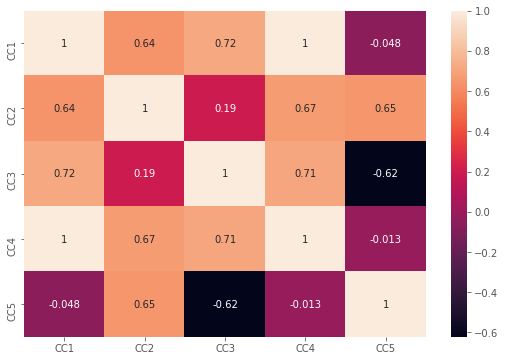

In [21]:
plt.figure(figsize=(9,6))
sns.heatmap(train_data[['CC1',	'CC2',	'CC3',	'CC4',	'CC5']].corr(),annot=True)

In [22]:
columns_heat =  ['der_1', 'der_2', 'der_3', 'der_4', 'der_5', 'der_6', 'der_7', 'der_8', 'der_9', 'der_10', 'der_11', 'der_12', 'der_13', 'der_14', 'der_15', 'der_16', 'der_17', 'der_18', 'der_19', 'der_20', 'der_21', 'der_22', 'der_23', 'der_24', 'der_25']

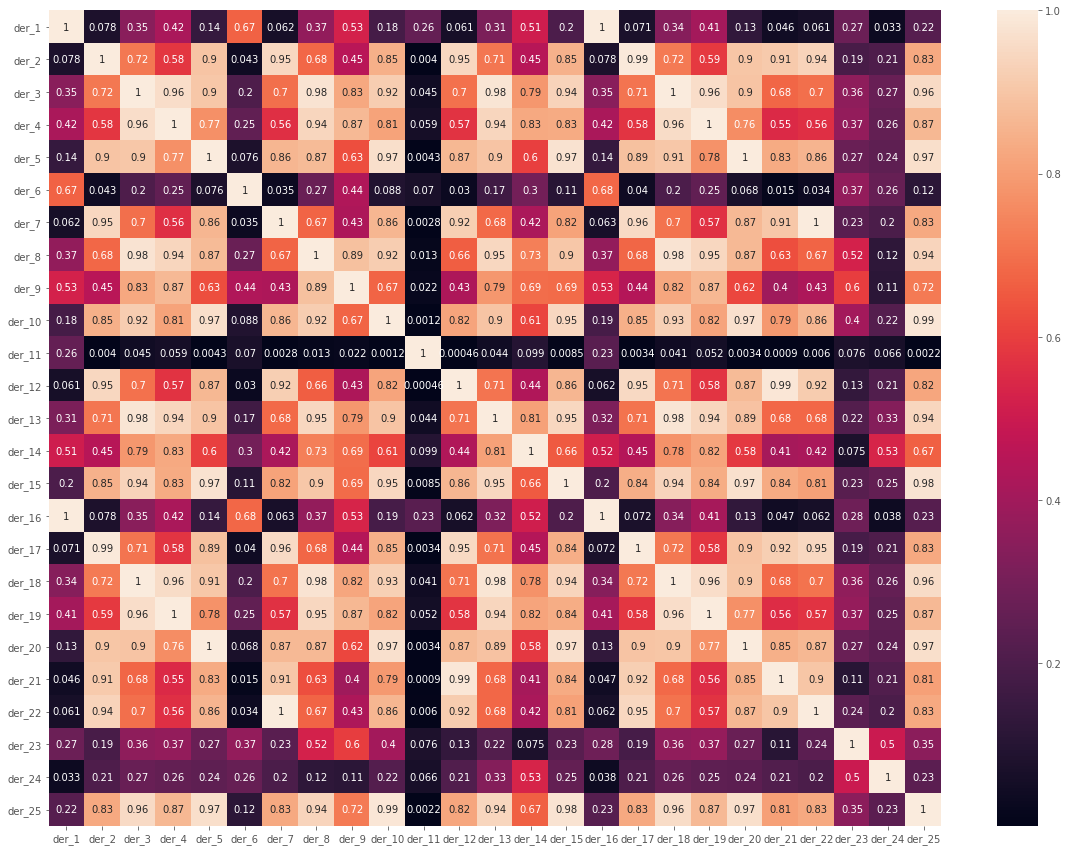

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data[columns_heat].corr().abs(),annot=True)

## **Let's make train and test Data for Machine Learning Modeling...**

In [24]:
dependent_variable = 'Num_of_comments'

In [25]:
# Create a list of independent variables
independent_variables = list(set(train_data.columns.tolist()) - {dependent_variable})

In [26]:
# Create the data of independent variables
X_train = train_data[independent_variables].values
X_test = test_data[independent_variables].values
# Create the dependent variable data
y_train = train_data[dependent_variable].values
y_test = test_data[dependent_variable].values

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((602813, 52), (1000, 52), (602813,), (1000,))

## **Preprocessing the Data With StandardScaler**

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [29]:
X_train

array([[ 0.18304359,  0.03057281, -1.16577676, ..., -0.6717368 ,
         0.00624485, -0.42789617],
       [ 0.18304359,  0.03057281, -1.16577676, ..., -0.6717368 ,
        -0.08423321, -0.42789617],
       [ 0.18304359,  0.03057281, -1.16577676, ..., -0.6717368 ,
        -0.08157209, -0.42789617],
       ...,
       [-2.28122001,  5.20713642, -0.76460081, ...,  3.30452823,
        -0.40356755, -0.42789617],
       [-2.28122001,  5.20713642, -0.76460081, ...,  3.30452823,
        -0.03899418,  2.33701552],
       [-2.28122001,  5.20713642, -0.76460081, ...,  3.30452823,
        -0.11616665, -0.42789617]])

## Let's Apply Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
y_pred=regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
#Calculating R2 
R2=r2_score(y_test, y_pred)
print(f'Test R2 is {R2}')
#Calculating R2 
R2_train=r2_score(y_train, y_pred_train)
print(f'Train R2 is {R2_train}')

Test R2 is 0.17721438532913958
Train R2 is 0.3361957198873313


In [ ]:
#Calculating MSE 
MSE=mean_squared_error(y_test, y_pred)
print(f'MSE is {MSE}')
#Calculating Mean Absolute Error
MAE=mean_absolute_error(y_test,y_pred)
print(f'MAE is {MAE}')

MSE is 9020.826293933875
MAE is 24.814883716446882


### Our model is not predicting very good let's try with doing some preprocessing with data

## **Let's Apply Lasso**

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred=lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)

In [ ]:
#Calculating R2 
R2=r2_score(y_test, y_pred)
print(f'Test R2 is {R2}')
#Calculating R2 
R2_train=r2_score(y_train, y_pred_train)
print(f'Train R2 is {R2_train}')

Test R2 is 0.18491939766319765
Train R2 is 0.3349180236101099


In [ ]:
#Calculating MSE 
MSE=mean_squared_error(y_test, y_pred)
print(f'MSE is {MSE}')
#Calculating Mean Absolute Error
MAE=mean_absolute_error(y_test,y_pred)
print(f'MAE is {MAE}')

MSE is 8936.350366524812
MAE is 25.17214302808278


## **Let's Apply Decision Tree**

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=10,
                      max_leaf_nodes=11,
                      min_samples_leaf=9, min_samples_split=12)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=11,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predicting the Test set results
y_pred=tree.predict(X_test)
y_pred_train = tree.predict(X_train)

In [ ]:
#Calculating R2 
R2=r2_score(y_test, y_pred)
print(f'Test R2 is {R2}')
#Calculating R2 
R2_train=r2_score(y_train, y_pred_train)
print(f'Train R2 is {R2_train}')

Test R2 is 0.46325935817878827
Train R2 is 0.5082950123368353


# **RandomForestRegressor**

In [33]:
ensemble=RandomForestRegressor(max_depth=10,
                      max_leaf_nodes=11,
                      min_samples_leaf=9, min_samples_split=7)

In [34]:
ensemble.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=11,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
# Predicting the Test set results
y_pred=ensemble.predict(X_test)
y_pred_train = ensemble.predict(X_train)

In [38]:
#Calculating R2 
R2=r2_score(y_test, y_pred)
print(f'Test R2 is {R2}')
#Calculating R2 
R2_train=r2_score(y_train, y_pred_train)
print(f'Train R2 is {R2_train}')

Test R2 is 0.4658393890730935
Train R2 is 0.5682577914555496


In [39]:
#Calculating MSE 
MSE=mean_squared_error(y_test, y_pred)
print(f'MSE is {MSE}')
#Calculating Mean Absolute Error
MAE=mean_absolute_error(y_test,y_pred)
print(f'MAE is {MAE}')

MSE is 5856.410221951675
MAE is 20.972052016546623


# **Let's Apply PCA**

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_train)
X_train = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2', 'PCA3','PCA4','PCA5','PCA6', 'PCA7', 'PCA8','PCA9','PCA10'])

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_test)
X_test = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2', 'PCA3','PCA4','PCA5','PCA6', 'PCA7', 'PCA8','PCA9','PCA10'])

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((602813, 10), (1000, 10), (602813,), (1000,))

In [45]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [46]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Predicting the Test set results
y_pred=regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [48]:
#Calculating R2 
R2=r2_score(y_test, y_pred)
print(f'Test R2 is {R2}')
#Calculating R2 
R2_train=r2_score(y_train, y_pred_train)
print(f'Train R2 is {R2_train}')

Test R2 is -1.3675400245619702
Train R2 is 0.31804716911303543


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=10,
                      max_leaf_nodes=11,
                      min_samples_leaf=9, min_samples_split=12)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=11,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predicting the Test set results
y_pred=tree.predict(X_test)
y_pred_train = tree.predict(X_train)

In [ ]:
#Calculating R2 
R2=r2_score(y_test, y_pred)
print(f'Test R2 is {R2}')
#Calculating R2 
R2_train=r2_score(y_train, y_pred_train)
print(f'Train R2 is {R2_train}')

Test R2 is 0.004206630385624299
Train R2 is 0.11683644009127059
